In [ ]:
pip install polygon-api-client

In [ ]:
pip install fire

In [ ]:
pip install questionary

In [ ]:
pip install load_dotenv

In [25]:
#import the necessary modules
import pandas as pd
#questionary
from pathlib import Path
import fire
import questionary
#API
import os
import json
import requests
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
%matplotlib inline
from IPython.display import display_html 


ModuleNotFoundError: No module named 'alpaca_trade_api'

In [26]:
POLYGON_API_KEY = 'JQfBpF3NpcYjuBdMiXeUr6q54XafY_pQ'

In [27]:
ticker_list = ["AMZN", "RTH", "AMT", "IYR", "XOM", "XLE", "SPY"]

In [28]:
import requests
import datetime
from time import sleep
from tqdm import tqdm
def get_prices(start_date,end_date,universe):
    data = pd.DataFrame()
    # end_at = datetime.datetime.now() 
    # begin_from = end_at + datetime.timedelta(days=-5000)
    for t in tqdm(universe):
        print(t)
        print(len(data))
        # for start in pd.date_range(start = begin_from, end = end_at,normalize=True,freq = '88D'):
        #     end = start + datetime.timedelta(days = 88)
        #     end = str(int((end - datetime.datetime(1970,1,1)).total_seconds()))
        #     start = str(int((start - datetime.datetime(1970,1,1)).total_seconds()))
        try:
            r = requests.get(f'https://api.polygon.io/v2/aggs/ticker/{t}/range/1/day/{start_date}/{end_date}?apiKey={POLYGON_API_KEY}')
        except json.JSONDecodeError:
            pass
        try:
            # print(r.json())
            temp_data = pd.DataFrame(r.json()['results'])
            temp_data['ticker'] = t
            data = data.append(temp_data, ignore_index=True)
            print(t+':'+str(pd.to_datetime(start_date, unit='s'))+':'+str(pd.to_datetime(end_date, unit='s')))
        except KeyError:
            print(f'{t} was not found')
            pass
        except ValueError:
            pass
        except ConnectionError as error:
            print(error)
            sleep(200)
            continue
        except TimeoutError as error:
            print(error)
            sleep(200)
            continue
        sleep(0.25)
#     data.to_csv(file_name,index = False)
    data.t = pd.to_datetime(data.t, unit = 'ms')
    columns_name = {'t': 'time', 'o': 'Open', 'c': 'Close', 'h': 'High', 'l': 'Low', 'v': 'Volume'} 
    data= data.rename(columns = columns_name)
    data = data[['time','ticker','Open', 'Close','High', 'Low', 'Volume']]
    data = data.set_index(['time', 'ticker'])
    data["daily_returns"] = data['Close'].groupby('ticker').pct_change()
    data = data.dropna()
    #data.to_csv(file_name, index = False)
    return data

In [114]:
start_date = "2021-03-01"
end_date = "2022-10-01"
all_data = get_prices(start_date=start_date, end_date=end_date, universe=ticker_list)
send_email(all_data)

  0%|                                                     | 0/7 [00:00<?, ?it/s]

AMZN
0


 14%|██████▍                                      | 1/7 [00:00<00:04,  1.44it/s]

RTH
402


 29%|████████████▊                                | 2/7 [00:01<00:03,  1.39it/s]

AMT
804


 43%|███████████████████▎                         | 3/7 [00:02<00:02,  1.45it/s]

IYR
1206


 57%|█████████████████████████▋                   | 4/7 [00:02<00:02,  1.47it/s]

XOM
1608


 71%|████████████████████████████████▏            | 5/7 [00:03<00:01,  1.49it/s]

XLE
2010


 86%|██████████████████████████████████████▌      | 6/7 [00:04<00:00,  1.50it/s]

SPY
2412


100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.48it/s]


(250, b'smtp.gmail.com at your service, [2601:640:8200:f110:e029:77b3:c432:fa1d]\nSIZE 35882577\n8BITMIME\nAUTH LOGIN PLAIN XOAUTH2 PLAIN-CLIENTTOKEN OAUTHBEARER XOAUTH\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8')
Email sent successfully!


In [30]:
all_data.index

MultiIndex([('2021-03-02 05:00:00', 'AMZN'),
            ('2021-03-03 05:00:00', 'AMZN'),
            ('2021-03-04 05:00:00', 'AMZN'),
            ('2021-03-05 05:00:00', 'AMZN'),
            ('2021-03-08 05:00:00', 'AMZN'),
            ('2021-03-09 05:00:00', 'AMZN'),
            ('2021-03-10 05:00:00', 'AMZN'),
            ('2021-03-11 05:00:00', 'AMZN'),
            ('2021-03-12 05:00:00', 'AMZN'),
            ('2021-03-15 04:00:00', 'AMZN'),
            ...
            ('2022-09-19 04:00:00',  'SPY'),
            ('2022-09-20 04:00:00',  'SPY'),
            ('2022-09-21 04:00:00',  'SPY'),
            ('2022-09-22 04:00:00',  'SPY'),
            ('2022-09-23 04:00:00',  'SPY'),
            ('2022-09-26 04:00:00',  'SPY'),
            ('2022-09-27 04:00:00',  'SPY'),
            ('2022-09-28 04:00:00',  'SPY'),
            ('2022-09-29 04:00:00',  'SPY'),
            ('2022-09-30 04:00:00',  'SPY')],
           names=['time', 'ticker'], length=2807)

In [31]:
idx = pd.IndexSlice

In [32]:
AMZN_daily_returns_df = all_data.loc[idx[:,'AMZN'],['daily_returns']]
AMZN_daily_returns_df



daily_returns
time                ticker               
2021-03-02 05:00:00 AMZN        -0.016404
2021-03-03 05:00:00 AMZN        -0.028932
2021-03-04 05:00:00 AMZN        -0.009128
2021-03-05 05:00:00 AMZN         0.007687
2021-03-08 05:00:00 AMZN        -0.016168
...                                   ...
2022-09-26 04:00:00 AMZN         0.012041
2022-09-27 04:00:00 AMZN        -0.006426
2022-09-28 04:00:00 AMZN         0.031466
2022-09-29 04:00:00 AMZN        -0.027201
2022-09-30 04:00:00 AMZN        -0.015679

[401 rows x 1 columns]

In [33]:
RTH_daily_returns_df = all_data.loc[idx[:,'RTH'],['daily_returns']]
RTH_daily_returns_df

daily_returns
time                ticker               
2021-03-02 05:00:00 RTH         -0.011517
2021-03-03 05:00:00 RTH         -0.016733
2021-03-04 05:00:00 RTH         -0.015095
2021-03-05 05:00:00 RTH          0.014944
2021-03-08 05:00:00 RTH          0.007248
...                                   ...
2022-09-26 04:00:00 RTH          0.001347
2022-09-27 04:00:00 RTH         -0.002305
2022-09-28 04:00:00 RTH          0.028436
2022-09-29 04:00:00 RTH         -0.021096
2022-09-30 04:00:00 RTH         -0.010967

[401 rows x 1 columns]

In [34]:
AMT_daily_returns_df = all_data.loc[idx[:,'AMT'],['daily_returns']]
AMT_daily_returns_df

daily_returns
time                ticker               
2021-03-02 05:00:00 AMT         -0.023203
2021-03-03 05:00:00 AMT         -0.028255
2021-03-04 05:00:00 AMT         -0.008477
2021-03-05 05:00:00 AMT         -0.005915
2021-03-08 05:00:00 AMT         -0.006700
...                                   ...
2022-09-26 04:00:00 AMT         -0.032516
2022-09-27 04:00:00 AMT         -0.003478
2022-09-28 04:00:00 AMT          0.002085
2022-09-29 04:00:00 AMT         -0.033204
2022-09-30 04:00:00 AMT          0.004585

[401 rows x 1 columns]

In [35]:
IYR_daily_returns_df = all_data.loc[idx[:,'IYR'],['daily_returns']]
IYR_daily_returns_df

daily_returns
time                ticker               
2021-03-02 05:00:00 IYR         -0.008108
2021-03-03 05:00:00 IYR         -0.008750
2021-03-04 05:00:00 IYR         -0.009872
2021-03-05 05:00:00 IYR          0.012669
2021-03-08 05:00:00 IYR          0.008224
...                                   ...
2022-09-26 04:00:00 IYR         -0.037179
2022-09-27 04:00:00 IYR         -0.014284
2022-09-28 04:00:00 IYR          0.019403
2022-09-29 04:00:00 IYR         -0.028551
2022-09-30 04:00:00 IYR          0.009673

[401 rows x 1 columns]

In [36]:
XOM_daily_returns_df = all_data.loc[idx[:,'XOM'],['daily_returns']]
XOM_daily_returns_df

daily_returns
time                ticker               
2021-03-02 05:00:00 XOM         -0.005851
2021-03-03 05:00:00 XOM          0.008026
2021-03-04 05:00:00 XOM          0.038747
2021-03-05 05:00:00 XOM          0.037813
2021-03-08 05:00:00 XOM         -0.000985
...                                   ...
2022-09-26 04:00:00 XOM         -0.020641
2022-09-27 04:00:00 XOM          0.020957
2022-09-28 04:00:00 XOM          0.036389
2022-09-29 04:00:00 XOM         -0.002026
2022-09-30 04:00:00 XOM         -0.015449

[401 rows x 1 columns]

In [37]:
XLE_daily_returns_df = all_data.loc[idx[:,'XLE'],['daily_returns']]
XLE_daily_returns_df

daily_returns
time                ticker               
2021-03-02 05:00:00 XLE         -0.005466
2021-03-03 05:00:00 XLE          0.014655
2021-03-04 05:00:00 XLE          0.023872
2021-03-05 05:00:00 XLE          0.037422
2021-03-08 05:00:00 XLE          0.001889
...                                   ...
2022-09-26 04:00:00 XLE         -0.024546
2022-09-27 04:00:00 XLE          0.011200
2022-09-28 04:00:00 XLE          0.044304
2022-09-29 04:00:00 XLE          0.000000
2022-09-30 04:00:00 XLE         -0.007989

[401 rows x 1 columns]

In [38]:
SPY_daily_returns_df = all_data.loc[idx[:,'SPY'],['daily_returns']]
SPY_daily_returns_df

daily_returns
time                ticker               
2021-03-02 05:00:00 SPY         -0.007803
2021-03-03 05:00:00 SPY         -0.013246
2021-03-04 05:00:00 SPY         -0.012375
2021-03-05 05:00:00 SPY          0.018397
2021-03-08 05:00:00 SPY         -0.004979
...                                   ...
2022-09-26 04:00:00 SPY         -0.009893
2022-09-27 04:00:00 SPY         -0.002553
2022-09-28 04:00:00 SPY          0.019676
2022-09-29 04:00:00 SPY         -0.020889
2022-09-30 04:00:00 SPY         -0.015463

[401 rows x 1 columns]

In [39]:
tech_daily_returns = pd.concat([AMZN_daily_returns_df, RTH_daily_returns_df], keys=["AMZN","RTH"])
tech_daily_returns

daily_returns
     time                ticker               
AMZN 2021-03-02 05:00:00 AMZN        -0.016404
     2021-03-03 05:00:00 AMZN        -0.028932
     2021-03-04 05:00:00 AMZN        -0.009128
     2021-03-05 05:00:00 AMZN         0.007687
     2021-03-08 05:00:00 AMZN        -0.016168
...                                        ...
RTH  2022-09-26 04:00:00 RTH          0.001347
     2022-09-27 04:00:00 RTH         -0.002305
     2022-09-28 04:00:00 RTH          0.028436
     2022-09-29 04:00:00 RTH         -0.021096
     2022-09-30 04:00:00 RTH         -0.010967

[802 rows x 1 columns]

In [40]:
RE_daily_returns = pd.concat([AMT_daily_returns_df, IYR_daily_returns_df], keys=["AMT","IYR"])
RE_daily_returns

daily_returns
    time                ticker               
AMT 2021-03-02 05:00:00 AMT         -0.023203
    2021-03-03 05:00:00 AMT         -0.028255
    2021-03-04 05:00:00 AMT         -0.008477
    2021-03-05 05:00:00 AMT         -0.005915
    2021-03-08 05:00:00 AMT         -0.006700
...                                       ...
IYR 2022-09-26 04:00:00 IYR         -0.037179
    2022-09-27 04:00:00 IYR         -0.014284
    2022-09-28 04:00:00 IYR          0.019403
    2022-09-29 04:00:00 IYR         -0.028551
    2022-09-30 04:00:00 IYR          0.009673

[802 rows x 1 columns]

In [41]:
energy_daily_returns = pd.concat([XOM_daily_returns_df, XLE_daily_returns_df], keys=["XOM","XLE"])
energy_daily_returns

daily_returns
    time                ticker               
XOM 2021-03-02 05:00:00 XOM         -0.005851
    2021-03-03 05:00:00 XOM          0.008026
    2021-03-04 05:00:00 XOM          0.038747
    2021-03-05 05:00:00 XOM          0.037813
    2021-03-08 05:00:00 XOM         -0.000985
...                                       ...
XLE 2022-09-26 04:00:00 XLE         -0.024546
    2022-09-27 04:00:00 XLE          0.011200
    2022-09-28 04:00:00 XLE          0.044304
    2022-09-29 04:00:00 XLE          0.000000
    2022-09-30 04:00:00 XLE         -0.007989

[802 rows x 1 columns]

In [42]:
#Display all sectors of the stock/ETF dataframes
dfT_style = tech_daily_returns.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Tech")
dfR_style = RE_daily_returns.style.set_table_attributes("style='display:inline'").set_caption("Real Estate")
dfE_style = energy_daily_returns.style.set_table_attributes("style='display:inline'").set_caption("Energy")


display_html(dfT_style._repr_html_() + dfR_style._repr_html_() + dfE_style._repr_html_(), raw=True)

NameError: name 'display_html' is not defined

### Analyzing Each Stock and ETF Individually

In [43]:
#Questionary SQL
#How much weight do you want in each stock?



In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
from pytz import timezone
from IPython.display import clear_output
from time import sleep
import numpy as np
import pyfolio as pf

In [46]:
Pandemic_prices_df = pd.concat([AMZN_daily_returns_df, RTH_daily_returns_df, AMT_daily_returns_df, IYR_daily_returns_df, XOM_daily_returns_df, XLE_daily_returns_df, SPY_daily_returns_df],axis=1, keys=["AMZN","RTH","AMT","IYR","XOM","XLE","SPY"])
display(Pandemic_prices_df.std())
display(Pandemic_prices_df.mean())

AMZN  daily_returns    0.024274
RTH   daily_returns    0.012819
AMT   daily_returns    0.015780
IYR   daily_returns    0.012097
XOM   daily_returns    0.020273
XLE   daily_returns    0.020233
SPY   daily_returns    0.011846
dtype: float64

AMZN  daily_returns   -0.000529
RTH   daily_returns    0.000065
AMT   daily_returns    0.000135
IYR   daily_returns   -0.000108
XOM   daily_returns    0.001296
XLE   daily_returns    0.001146
SPY   daily_returns   -0.000146
dtype: float64

In [47]:
#Summary statistics for AMZN stock using .std() and .mean()
display(AMZN_daily_returns_df.std())
display(AMZN_daily_returns_df.mean())



daily_returns    0.024274
dtype: float64

daily_returns   -0.000529
dtype: float64

In [48]:
#Summary statistics for RTH stock using .std() and .mean()
display(RTH_daily_returns_df.std())
display(RTH_daily_returns_df.mean())

daily_returns    0.012819
dtype: float64

daily_returns    0.000065
dtype: float64

In [49]:
#Summary statistics for AMT stock using .std() and .mean()
display(AMT_daily_returns_df.std())
display(AMT_daily_returns_df.mean())


daily_returns    0.01578
dtype: float64

daily_returns    0.000135
dtype: float64

In [50]:
#Summary statistics for IYR stock using .std() and .mean()
display(IYR_daily_returns_df.std())
display(IYR_daily_returns_df.mean())


daily_returns    0.012097
dtype: float64

daily_returns   -0.000108
dtype: float64

In [51]:
#Summary statistics for XOM stock using .std() and .mean()
display(XOM_daily_returns_df.std())
display(XOM_daily_returns_df.mean())


daily_returns    0.020273
dtype: float64

daily_returns    0.001296
dtype: float64

In [52]:
#Summary statistics for XLE stock using .std() and .mean()
display(XLE_daily_returns_df.std())
display(XLE_daily_returns_df.mean())

daily_returns    0.020233
dtype: float64

daily_returns    0.001146
dtype: float64

In [53]:
display(SPY_daily_returns_df.std())
display(SPY_daily_returns_df.mean())

daily_returns    0.011846
dtype: float64

daily_returns   -0.000146
dtype: float64

In [54]:
#Summary statistics for AMZN using .describe()
AMZN_daily_returns_df.describe()

daily_returns
count     401.000000
mean       -0.000529
std         0.024274
min        -0.140494
25%        -0.013562
50%        -0.000037
75%         0.012018
max         0.135359

In [55]:
RTH_daily_returns_df.describe()

daily_returns
count     401.000000
mean        0.000065
std         0.012819
min        -0.074149
25%        -0.005793
50%         0.000220
75%         0.007248
max         0.044233

In [56]:
#Summary statistics for AMT using .describe()
AMT_daily_returns_df.describe()

daily_returns
count     401.000000
mean        0.000135
std         0.015780
min        -0.064363
25%        -0.008867
50%         0.000703
75%         0.009777
max         0.051052

In [57]:
#Summary statistics for IYR using .describe()
IYR_daily_returns_df.describe()

daily_returns
count     401.000000
mean       -0.000108
std         0.012097
min        -0.049313
25%        -0.006811
50%         0.000269
75%         0.007596
max         0.033212

In [58]:
#Summary statistics for XOM using .describe()
XOM_daily_returns_df.describe()

daily_returns
count     401.000000
mean        0.001296
std         0.020273
min        -0.078853
25%        -0.011253
50%         0.001806
75%         0.014258
max         0.064113

In [59]:
#Summary statistics for XLE using .describe()
XLE_daily_returns_df.describe()

daily_returns
count     401.000000
mean        0.001146
std         0.020233
min        -0.082730
25%        -0.010625
50%         0.001889
75%         0.014668
max         0.044304

In [60]:
SPY_daily_returns_df.describe()

daily_returns
count     401.000000
mean       -0.000146
std         0.011846
min        -0.043482
25%        -0.006597
50%         0.000365
75%         0.007113
max         0.031794

In [61]:
# Variance For Each Stock and ETF
Pandemic_prices_df.var()

AMZN  daily_returns    0.000589
RTH   daily_returns    0.000164
AMT   daily_returns    0.000249
IYR   daily_returns    0.000146
XOM   daily_returns    0.000411
XLE   daily_returns    0.000409
SPY   daily_returns    0.000140
dtype: float64

In [62]:
# Variance Of Amzn
AMZN_var=AMZN_daily_returns_df.var()
AMZN_var

daily_returns    0.000589
dtype: float64

In [63]:
# Variance For RTH
RTH_var=RTH_daily_returns_df.var()
RTH_var

daily_returns    0.000164
dtype: float64

In [64]:
# Variance Of IYR
IYR_var=IYR_daily_returns_df.var()
IYR_var

daily_returns    0.000146
dtype: float64

In [65]:
# Variance Of AMT
AMT_var=AMT_daily_returns_df.var()
AMT_var

daily_returns    0.000249
dtype: float64

In [66]:
# Variance Of XOM
XOM_var=XOM_daily_returns_df.var()
XOM_var

daily_returns    0.000411
dtype: float64

In [67]:
# Variance Of XLE
XLE_var=XLE_daily_returns_df.var()
XLE_var

daily_returns    0.000409
dtype: float64

In [68]:
SPY_var = SPY_daily_returns_df.var()
SPY_var

daily_returns    0.00014
dtype: float64

In [69]:
# Covariance for Each Stock and ETF
Pandemic_prices_df.cov()

AMZN           RTH           AMT           IYR  \
                   daily_returns daily_returns daily_returns daily_returns   
AMZN daily_returns      0.000589           NaN           NaN           NaN   
RTH  daily_returns           NaN      0.000164           NaN           NaN   
AMT  daily_returns           NaN           NaN      0.000249           NaN   
IYR  daily_returns           NaN           NaN           NaN      0.000146   
XOM  daily_returns           NaN           NaN           NaN           NaN   
XLE  daily_returns           NaN           NaN           NaN           NaN   
SPY  daily_returns           NaN           NaN           NaN           NaN   

                             XOM           XLE           SPY  
                   daily_returns daily_returns daily_returns  
AMZN daily_returns           NaN           NaN           NaN  
RTH  daily_returns           NaN           NaN           NaN  
AMT  daily_returns           NaN           NaN           NaN  
IYR  daily_returns           NaN           NaN           NaN  
XOM  daily_returns      0.000411           NaN           NaN  
XLE  daily_returns           NaN      0.000409           NaN  
SPY  daily_returns           NaN           NaN       0.00014

In [70]:
# Annualized returns of AMZN
AMZN_Annual_Ret = AMZN_daily_returns_df.mean()*252
AMZN_Annual_Ret

daily_returns   -0.133347
dtype: float64

In [71]:
# Annualized returns of RTH
RTH_Annual_Ret = RTH_daily_returns_df.mean()*252
RTH_Annual_Ret

daily_returns    0.016419
dtype: float64

In [72]:
# Annualized returns of AMT
AMT_Annual_Ret = AMT_daily_returns_df.mean()*252
AMT_Annual_Ret

daily_returns    0.034093
dtype: float64

In [73]:
# Annualized returns of IYR
IYR_Annual_Ret = IYR_daily_returns_df.mean()*252
IYR_Annual_Ret

daily_returns   -0.02729
dtype: float64

In [74]:
# Annualized returns of XLE
XLE_Annual_Ret = XLE_daily_returns_df.mean()*252
XLE_Annual_Ret

daily_returns    0.28871
dtype: float64

In [75]:
# Annualized returns of XOM
XOM_Annual_Ret = XOM_daily_returns_df.mean()*252
XOM_Annual_Ret

daily_returns    0.326535
dtype: float64

In [76]:
SPY_Annual_Ret = SPY_daily_returns_df.mean()*252
SPY_Annual_Ret

daily_returns   -0.036857
dtype: float64

In [77]:
year_trading_days = 252

In [78]:
# Annualized std dev of AMZN
annual_std_dev_AMZN = AMZN_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_AMZN

daily_returns    0.385341
dtype: float64

In [79]:
# Annualized std dev of RTH
annual_std_dev_RTH = RTH_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_RTH

daily_returns    0.203492
dtype: float64

In [80]:
# Annualized std dev of AMT
annual_std_dev_AMT = AMT_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_AMT

daily_returns    0.250495
dtype: float64

In [81]:
# Annualized std dev of IYR
annual_std_dev_IYR = IYR_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_IYR

daily_returns    0.192028
dtype: float64

In [82]:
# Annualized std dev of XLE
annual_std_dev_XLE = XLE_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_XLE

daily_returns    0.32119
dtype: float64

In [83]:
# Annualized std dev of XOM
annual_std_dev_XOM= XOM_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_XOM

daily_returns    0.32183
dtype: float64

In [84]:
# Annualized std dev of SPY
annual_std_dev_SPY = SPY_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_SPY

daily_returns    0.188044
dtype: float64

In [85]:
#Sharpe ratio for each stock and ETF 
Sharpe_AMZN = AMZN_Annual_Ret/annual_std_dev_AMZN
Sharpe_AMZN

daily_returns   -0.346048
dtype: float64

In [86]:
#Sharpe ratio for each stock and ETF 
Sharpe_RTH = RTH_Annual_Ret/annual_std_dev_RTH
Sharpe_RTH

daily_returns    0.080688
dtype: float64

In [87]:
#Sharpe ratio for each stock and ETF 
Sharpe_IYR = IYR_Annual_Ret/annual_std_dev_IYR
Sharpe_IYR

daily_returns   -0.142116
dtype: float64

In [88]:
#Sharpe ratio for each stock and ETF 
Sharpe_XLE = XLE_Annual_Ret/annual_std_dev_XLE
Sharpe_XLE

daily_returns    0.898874
dtype: float64

In [89]:
#Sharpe ratio for each stock and ETF 
Sharpe_XOM = XOM_Annual_Ret/annual_std_dev_XOM
Sharpe_XOM

daily_returns    1.014621
dtype: float64

In [90]:
#Sharpe ratio for each stock and ETF 
Sharpe_SPY = SPY_Annual_Ret/annual_std_dev_SPY
Sharpe_SPY

daily_returns   -0.196003
dtype: float64

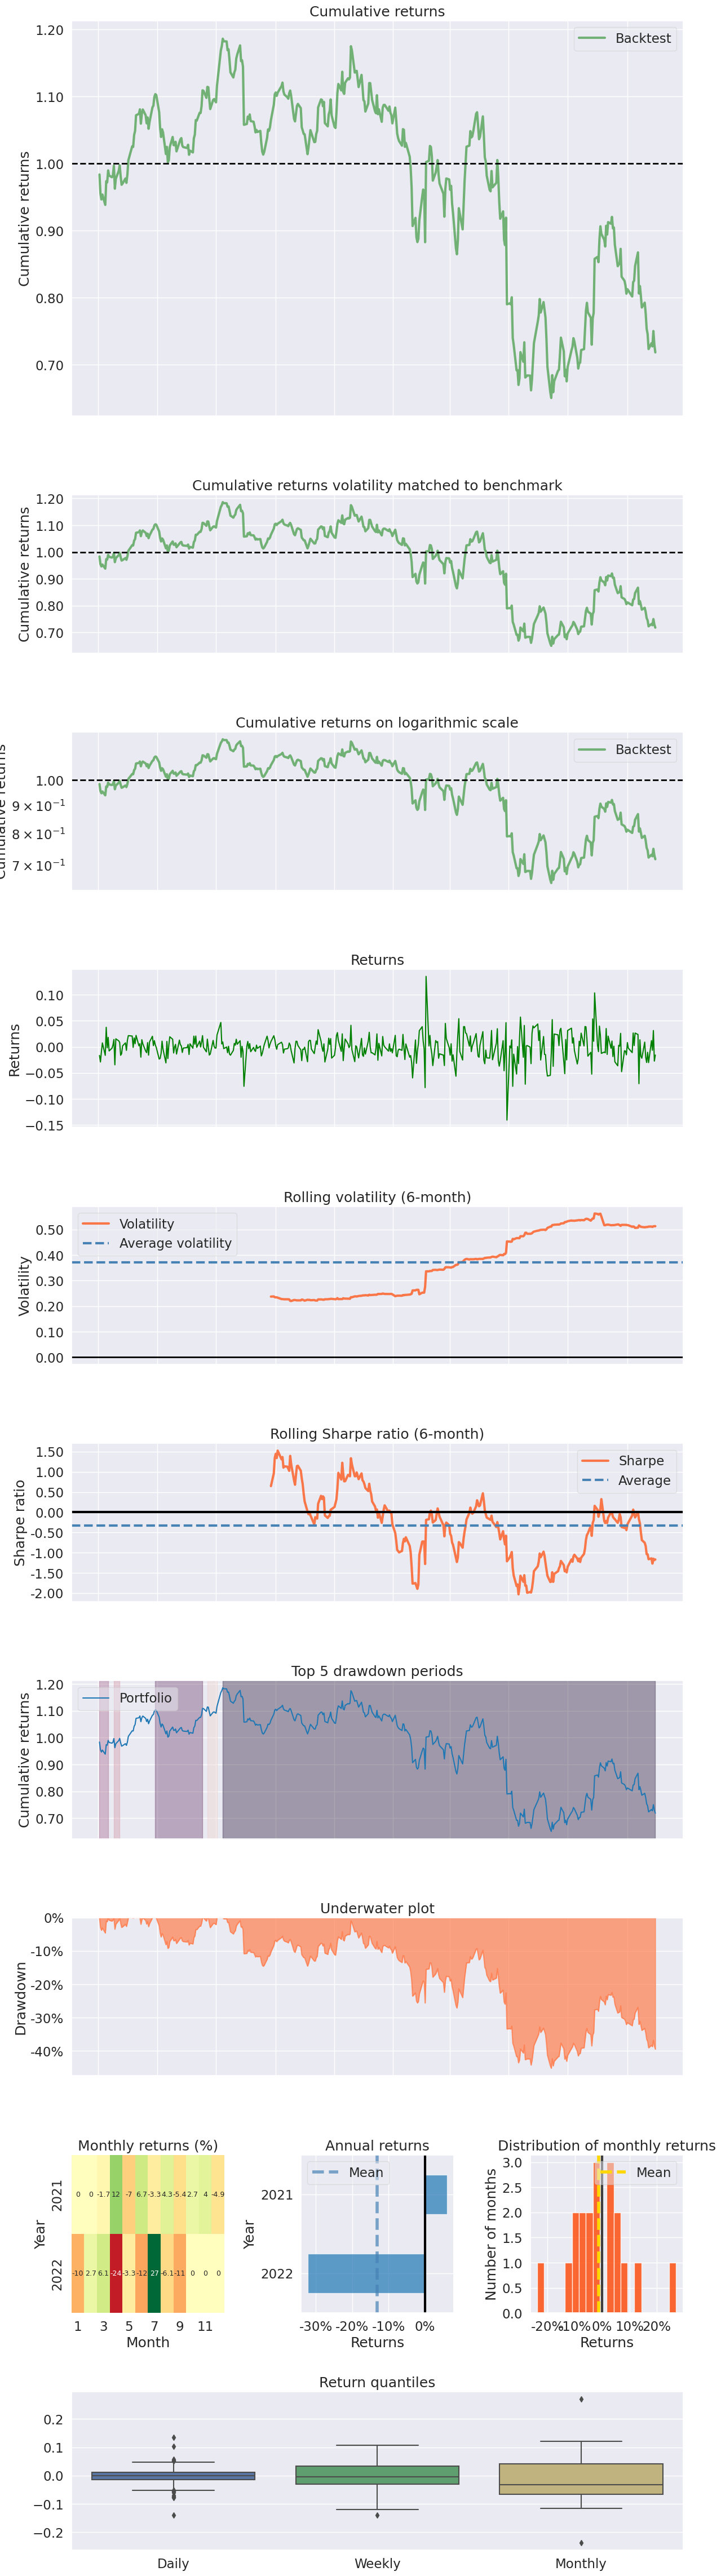

In [91]:
result = pf.create_returns_tear_sheet(AMZN_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("amzn_postpan_tearsheet.png", format = "png")

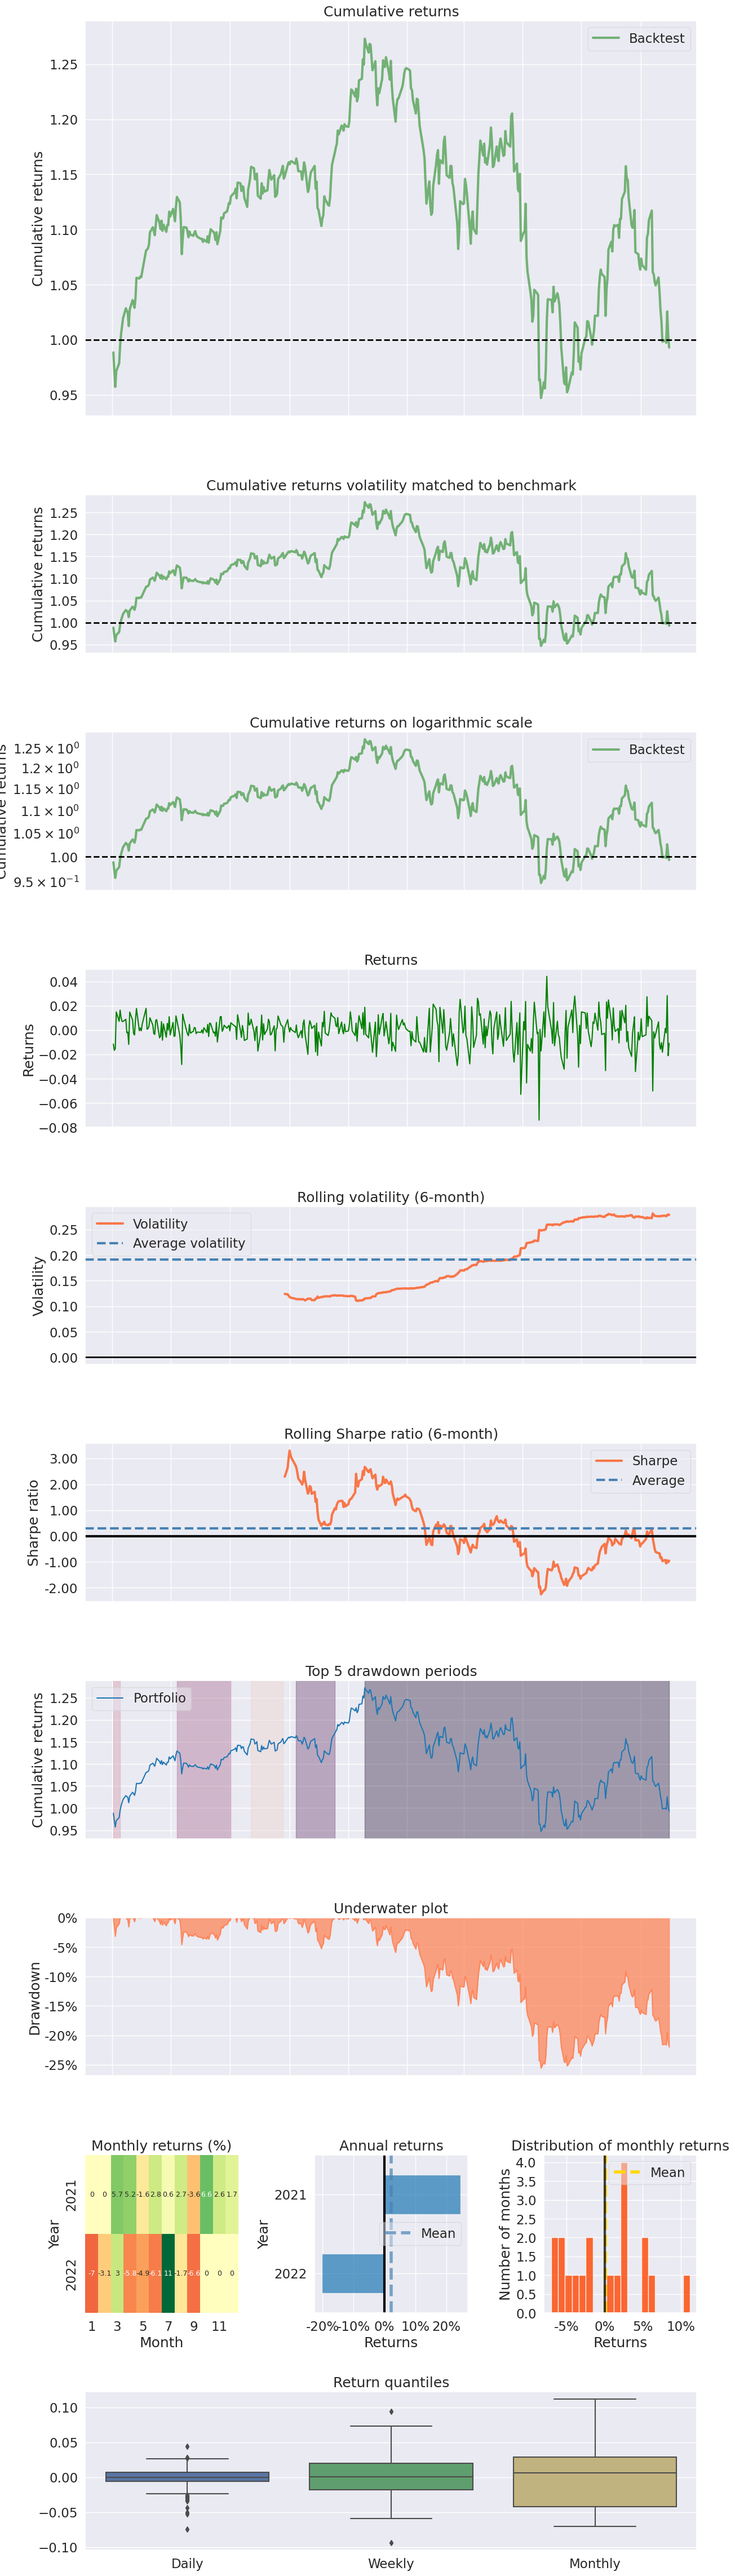

In [92]:
result = pf.create_returns_tear_sheet(RTH_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("RTH_postpan_tearsheet.png", format = "png")

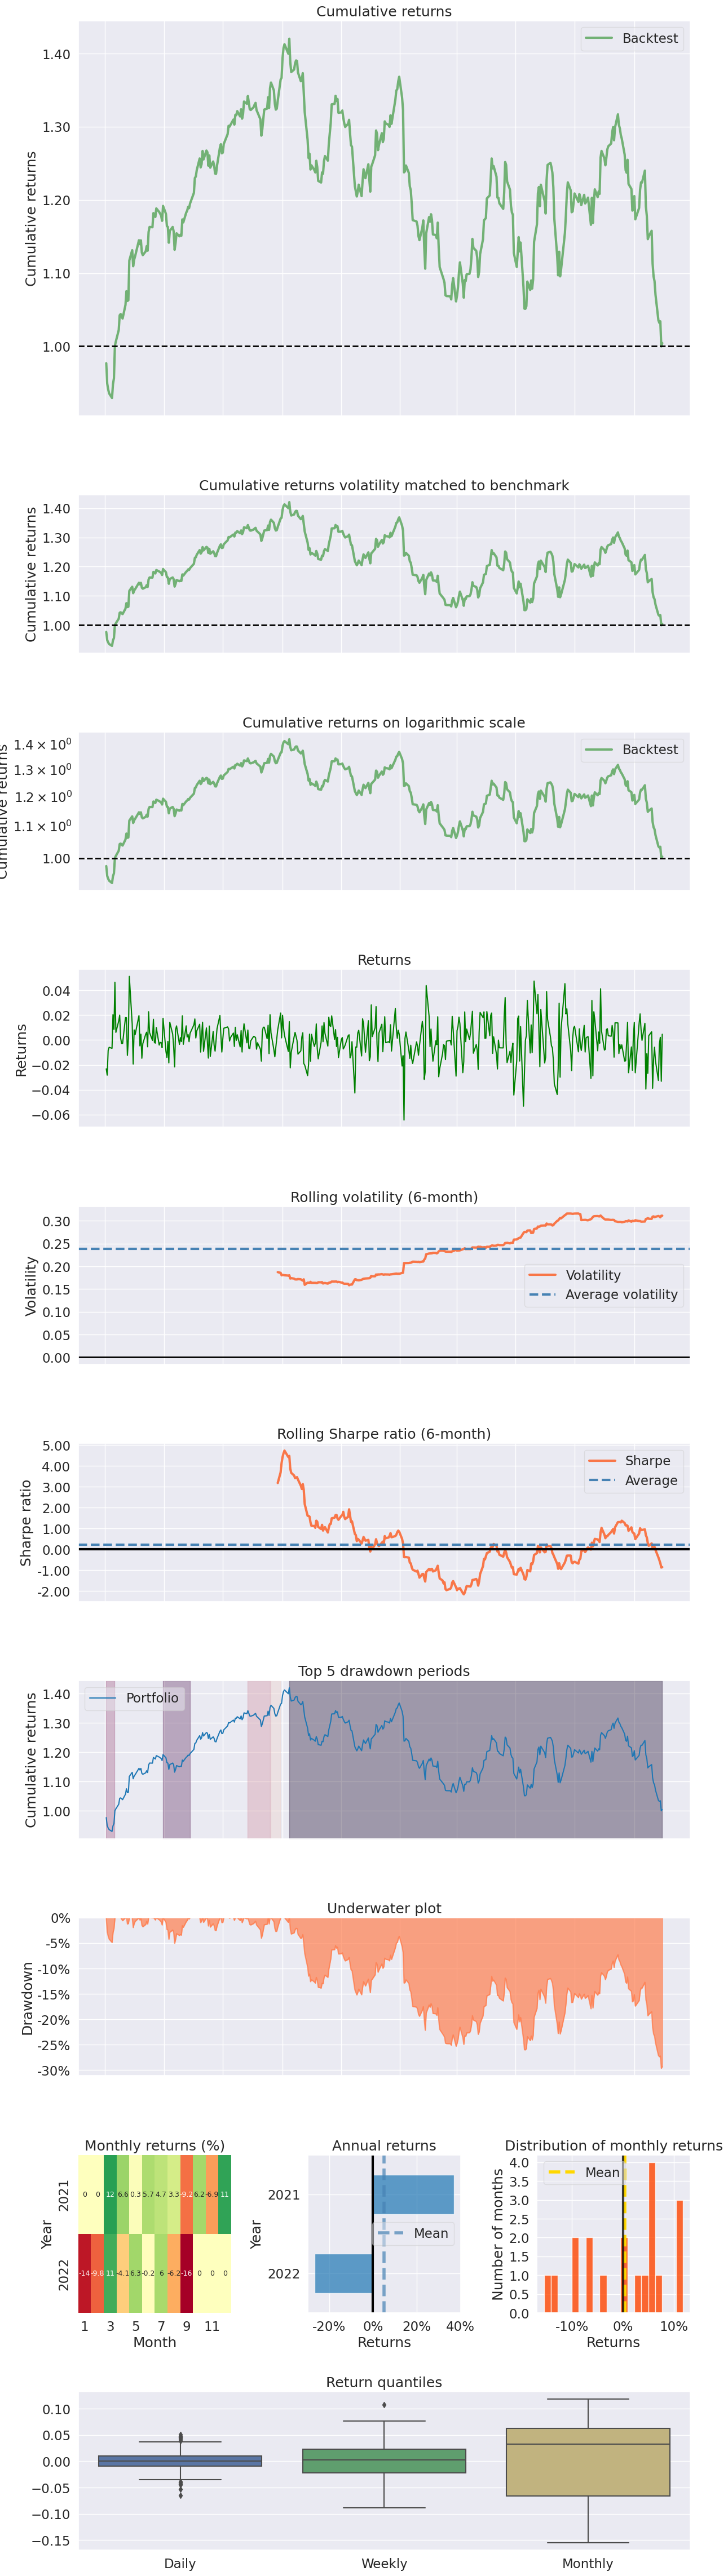

In [93]:
result = pf.create_returns_tear_sheet(AMT_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("amt_postpan_tearsheet.png", format = "png")


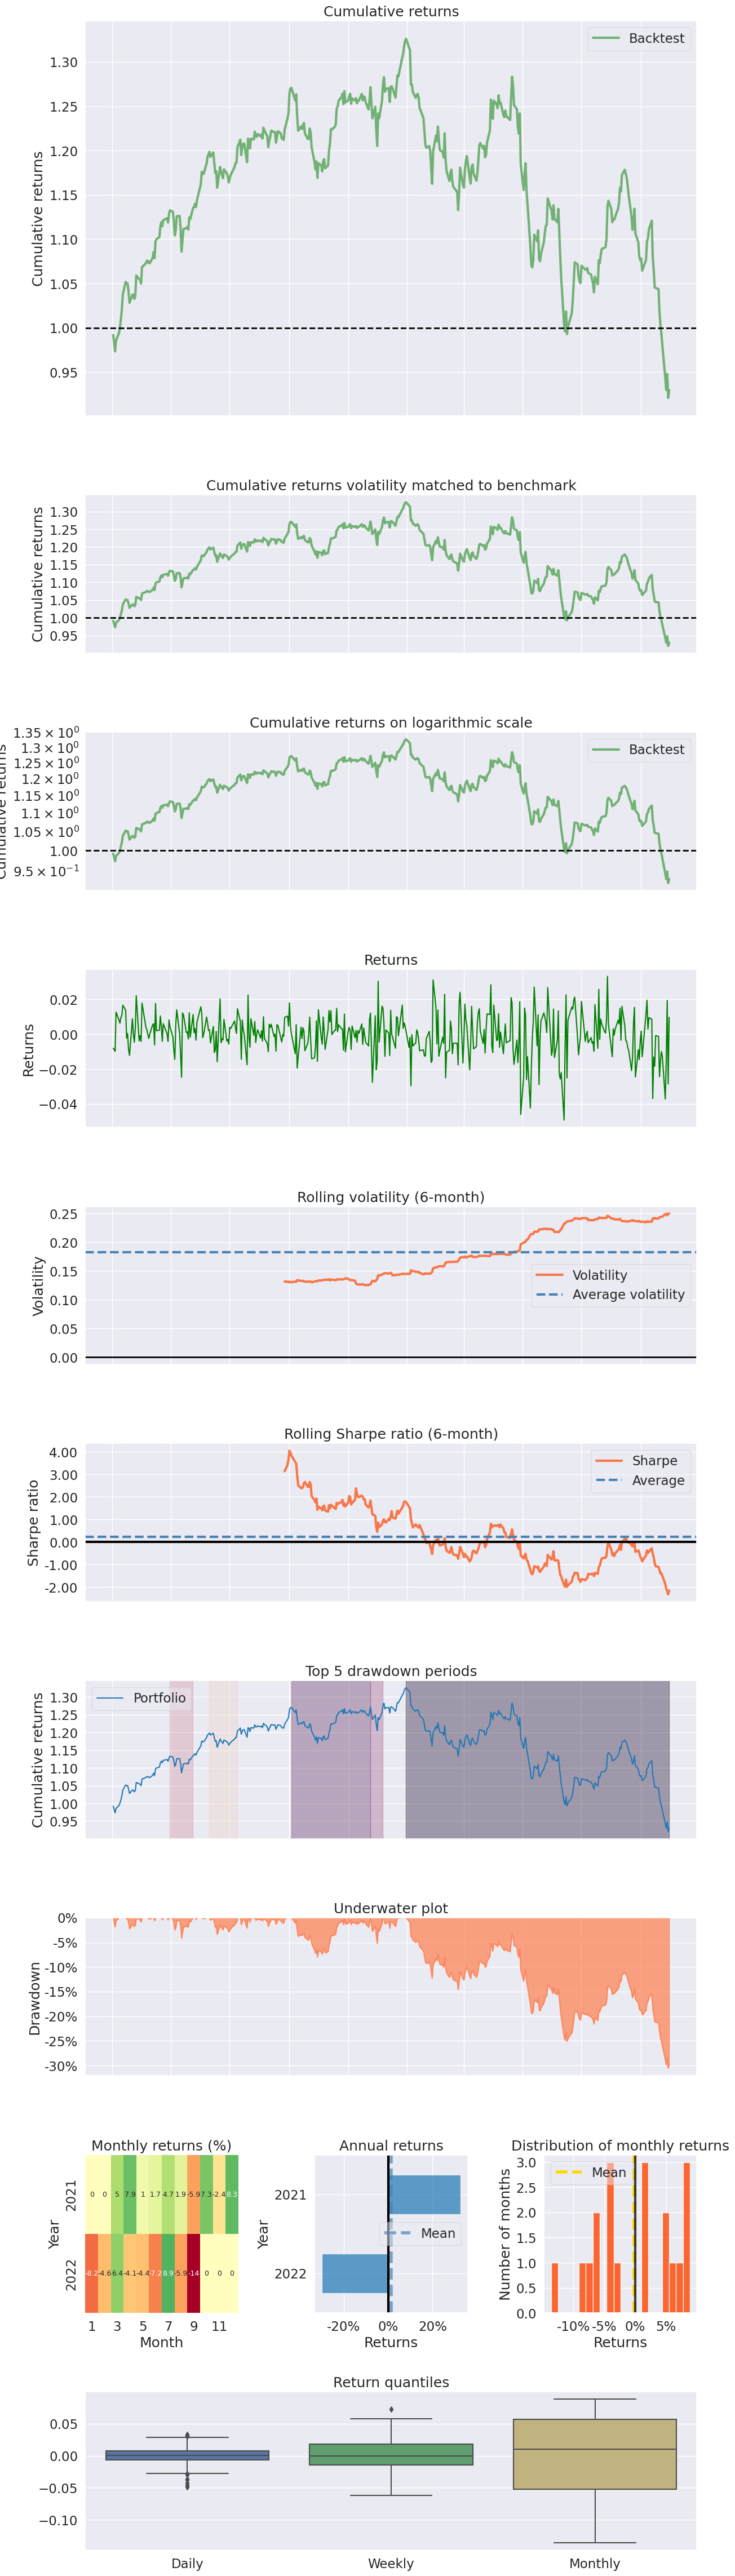

In [94]:
result = pf.create_returns_tear_sheet(IYR_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("iyr_postpan_tearsheet.png", format = "png")

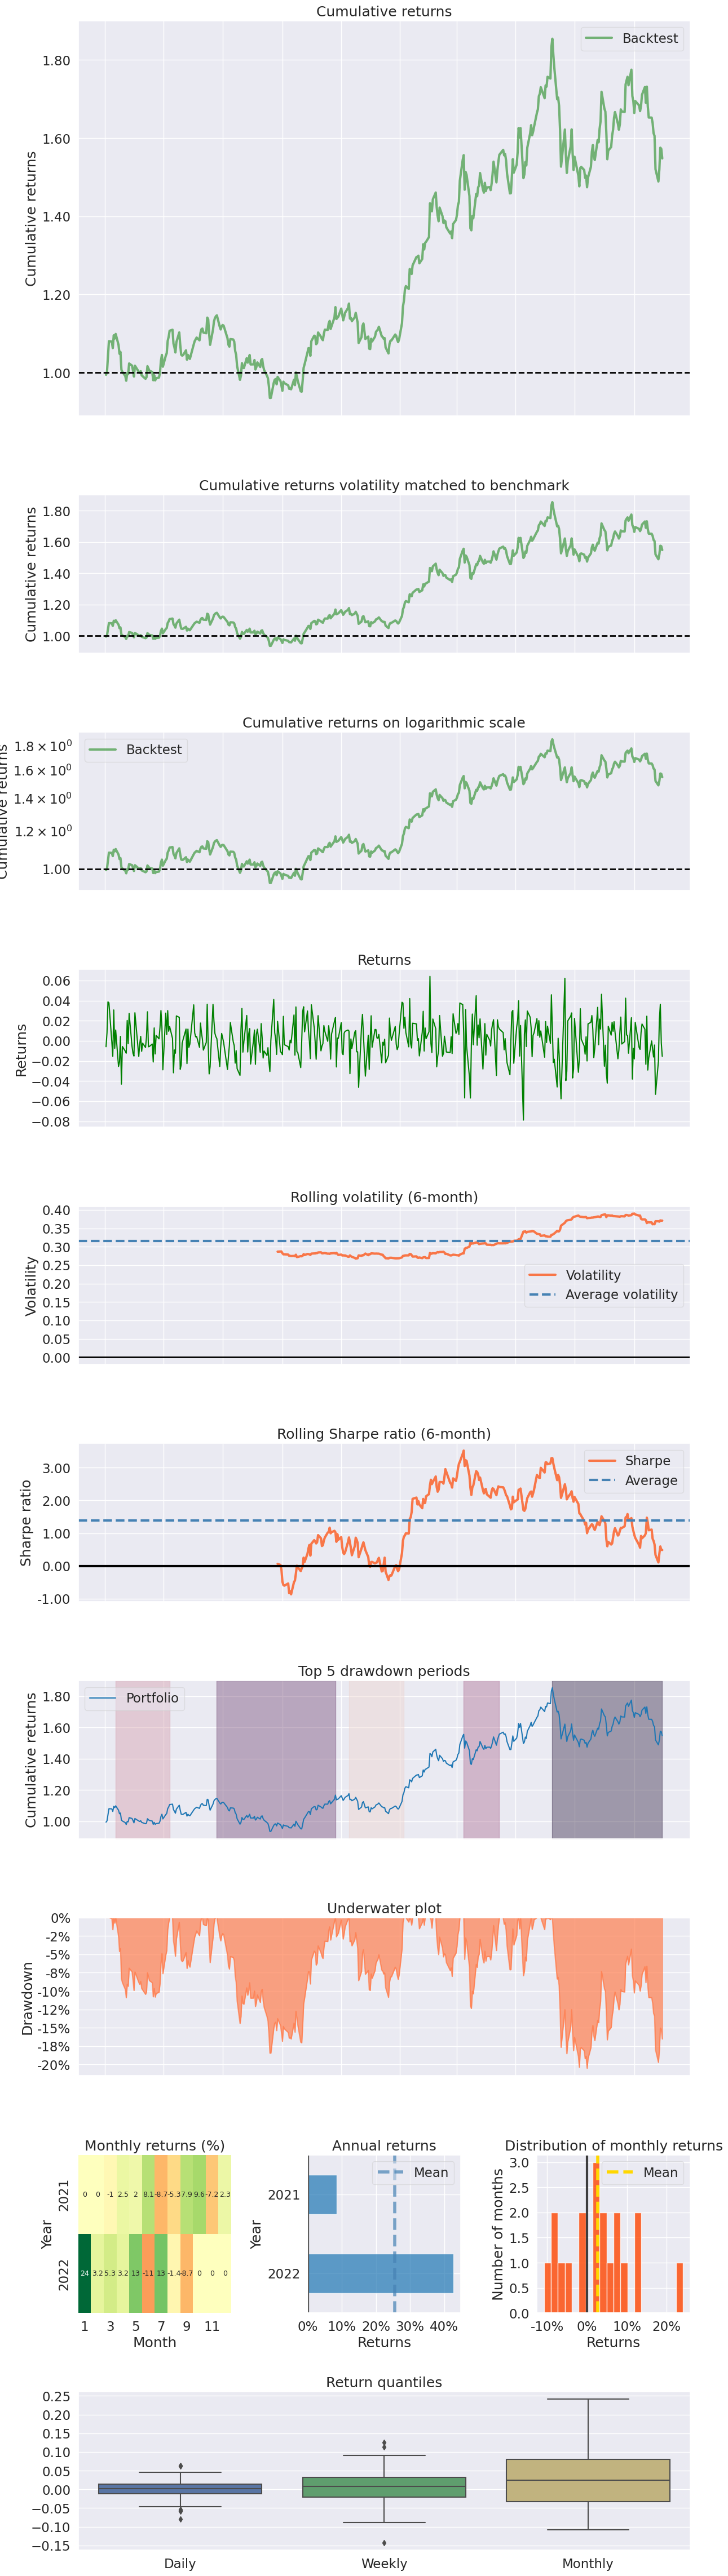

In [95]:
result = pf.create_returns_tear_sheet(XOM_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("xom_postpan_tearsheet.png", format = "png")


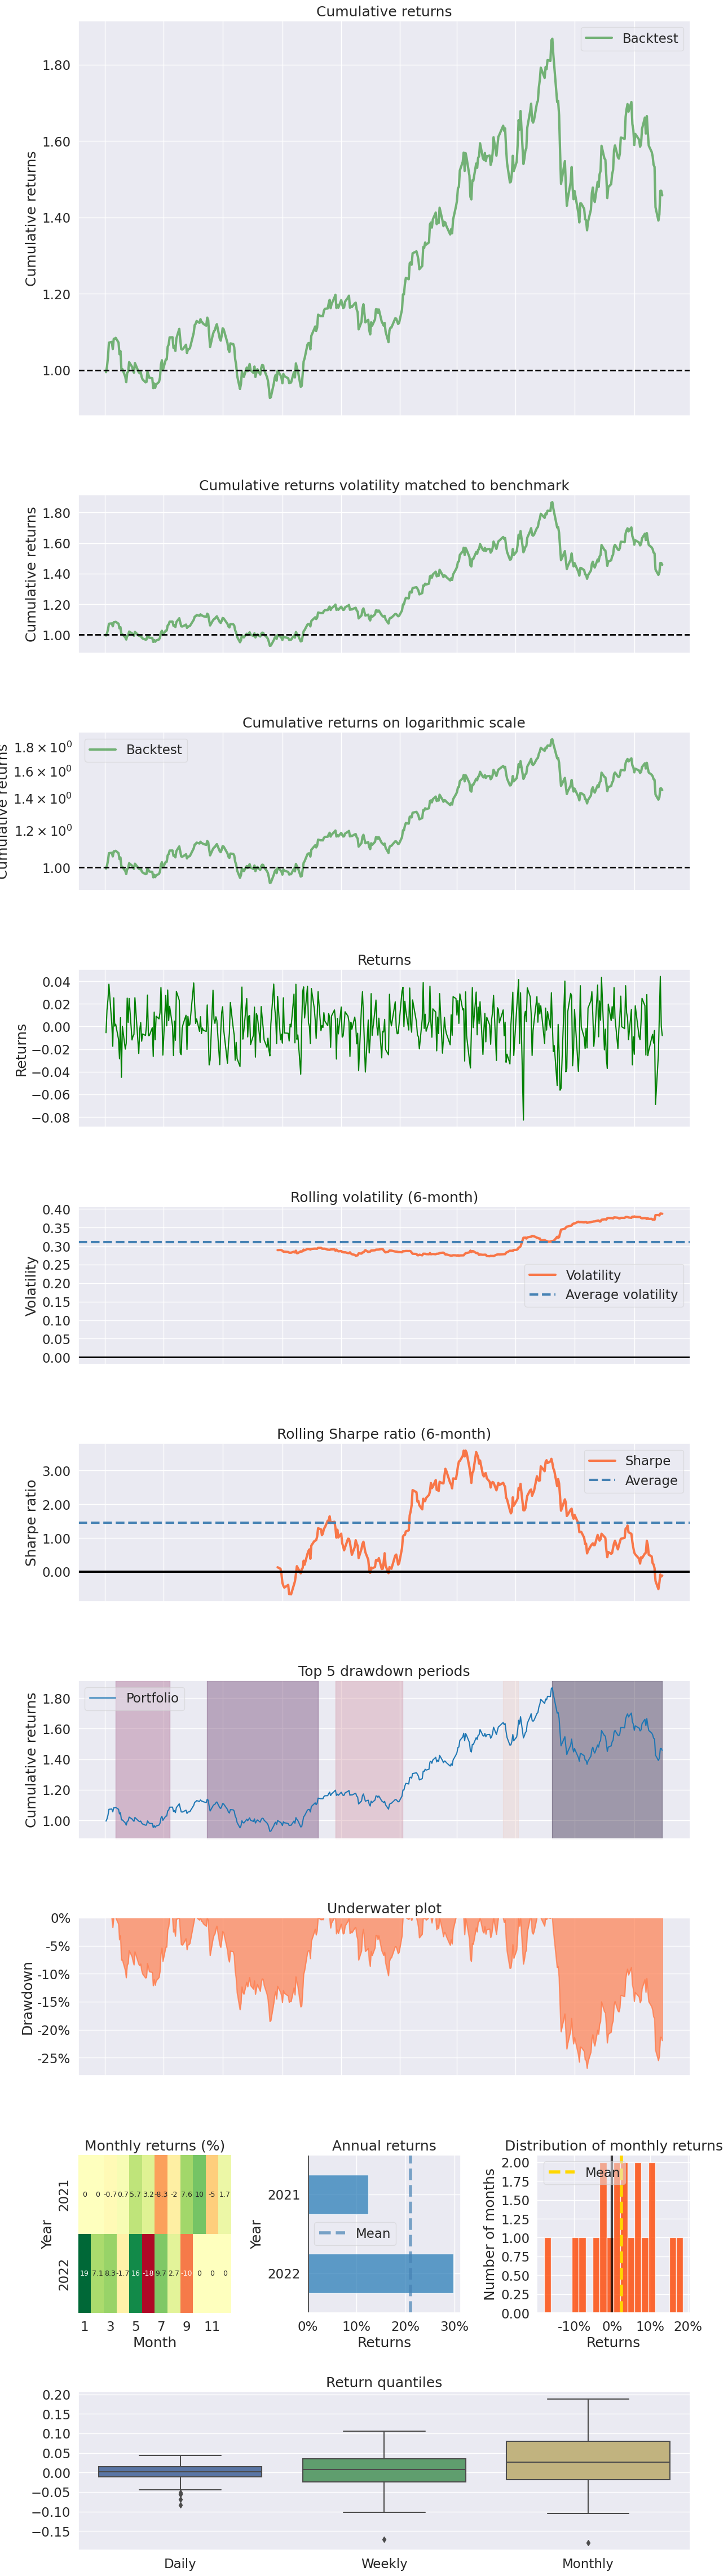

In [96]:
result = pf.create_returns_tear_sheet(XLE_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("xle_postpan_tearsheet.png", format = "png")


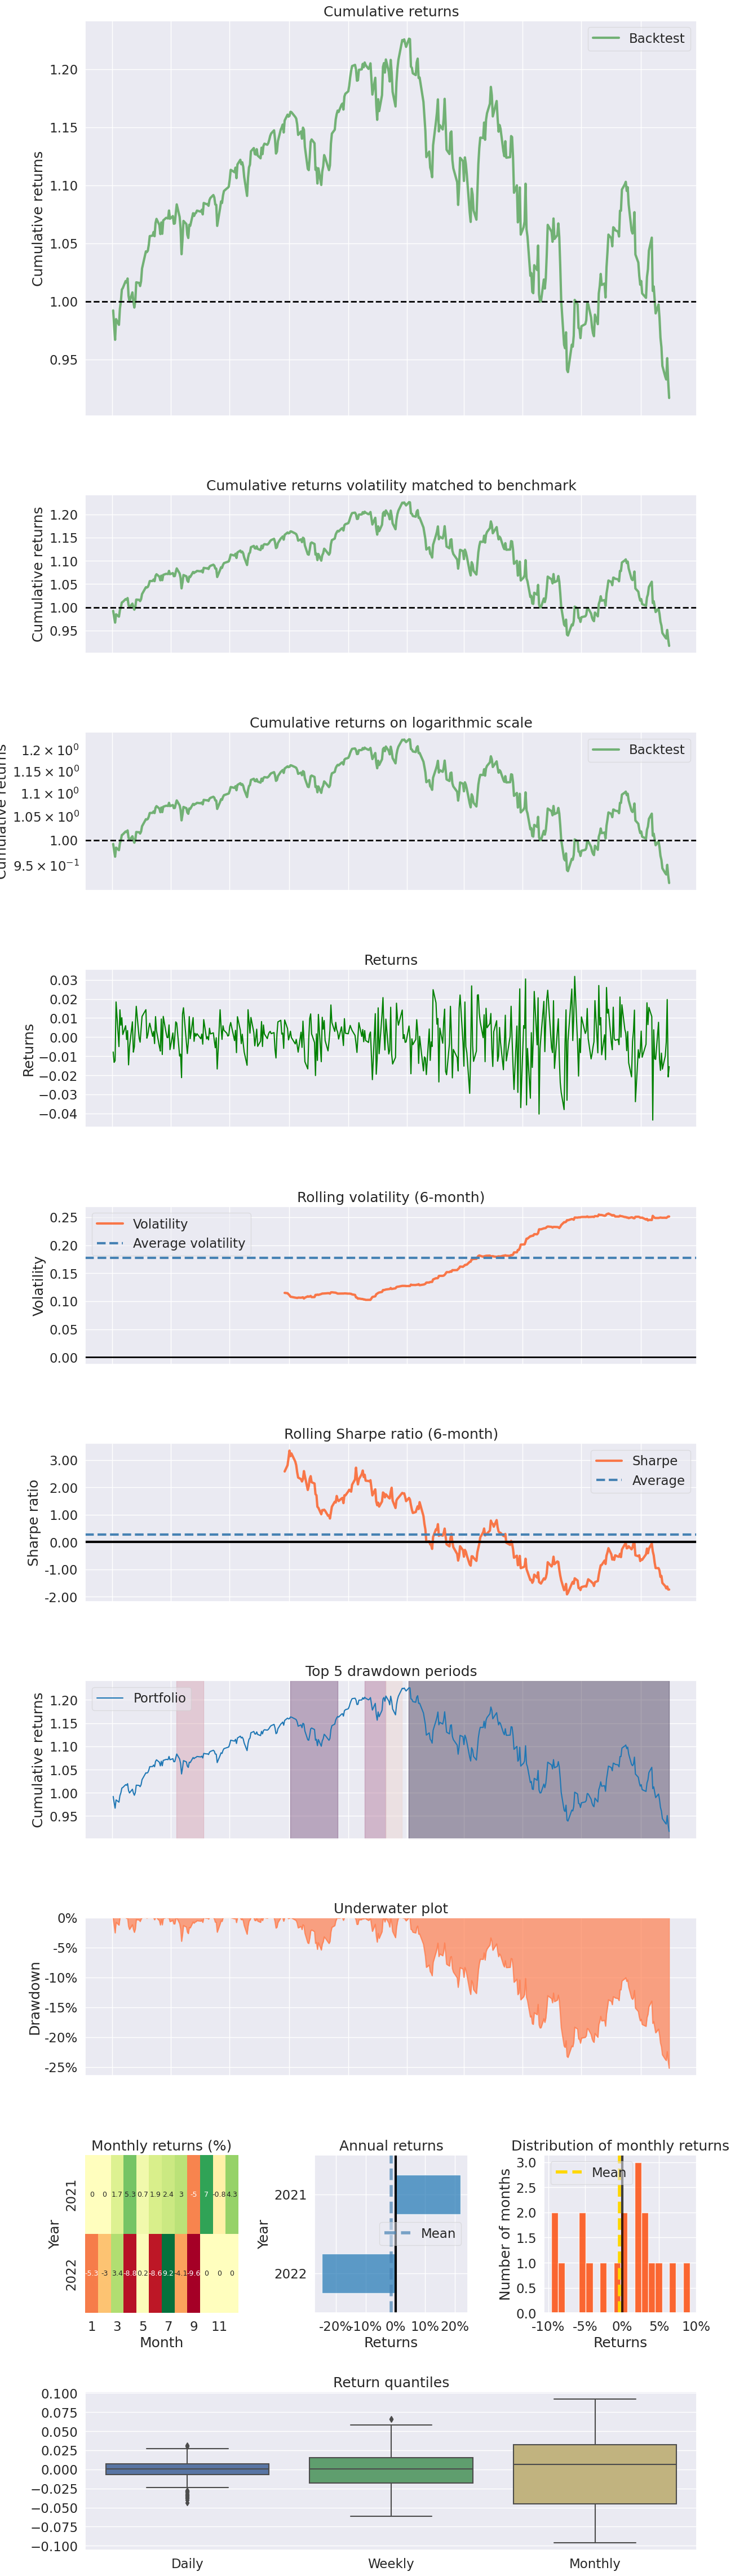

In [97]:
result = pf.create_returns_tear_sheet(SPY_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("spy_postpan_tearsheet.png", format = "png")


In [98]:
# Calculate betas of AMZN, RTH, AMT, IYR, XOM, XLE 

# Display the beta of all stocks and ETFS

In [99]:
# Calculate alphas of AMZN, RTH, AMT, IYR, XOM, XLE 

# Display the alphas of all stocks and ETFS


### Analyzing What Would Happen To A Portfolio in Each Sector For the Period Before the Pandemic

In [100]:
#Questionary SQL
#How much weight do you want in each stock?




In [101]:
#Portfolio Returns for Tech: use (portfolio_return = weightAMZN * meanAMZN + weightRTH * meanRTH)



In [102]:
#Portfolio Returns for Real Estate: use (portfolio_return = weightAMT * meanAMT + weightIYR * meanIYR)



In [103]:
#Portfolio Returns for Energy: use (portfolio_return = weightXOM * meanXOM + weightXLE * meanXLE)



In [104]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using tech portfolio returns information
# The ETF SPY will represent the market



In [105]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using tech portfolio returns information
# The ETF SPY will represent the market

In [106]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using Energy portfolio returns information
# The ETF SPY will represent the market

In [107]:
# Using the Pandas rolling function in conjunction with the var function, 
# calculate the 30-day rolling variance for the S&P 500 using tech daily returns information

# Visualize the 30-day rolling variance of the S&P 500
# Be sure to adjust the figure size and add a title

In [108]:
#Monte Carlo Simulation


In [109]:
#Box and Whisker Plot

In [110]:
#HVPlot

In [111]:
#bar plot comparing returns of all sectors 

In [112]:
#bar plot comparing returns of all portfolio

In [113]:
import time, ssl, smtplib, os
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.header import Header

def send_email(all_data):
    
    user = 'Fintechucb2022@gmail.com'
    key = 'nzoenmvhugqqatjt'
    to = ['besmookler@gmail.com', 'Kevtech577@gmail.com', 'christinepham218@gmail.com'] 
    
    subject = 'API call made'
    email_body = """\
    Hey Everyone,
    
    An API call has been made to check the stock data!
    
    Best Regards,
    Fintech Portfolio Team!"""%all_data
    
    message = MIMEMultipart()
    message['From'] = Header(user.split("@")[0])
    # message['To'] = Header(to)     
    message['Subject'] = Header(subject)
    message.attach(MIMEText(email_body, 'plain', 'utf-8'))
    
    context = ssl.create_default_context()
    email_port = 465
    with smtplib.SMTP_SSL(host = "smtp.gmail.com", port = email_port, context = context) as server:
        server.login(user, key)
        print(server.ehlo())
        if server.ehlo()[0] == 250:
            server.sendmail(key,to, message.as_string())
            print('Email sent successfully!')
            
            server.quit()
        else:
            print(f'Unable to establish connection with server! Error code: {server.ehlo()[0]}')
            server.quit()